## **수행평가 : 다중 분류 모델**

이번 시간에는 다중 분류 모델에 관하여 학습한다.

지난 시간에는 이진 분류 모델에 관하여 학습했다.

(자동화 중)

##**이진 분류 모델**
* 입력을 두 개의 클래스로 분류하는 모델이다.
* 입력에 따라 나타나는 출력이 연속적인 값이 아닐 경우 분류 모델을 사용한다.

#### 로지스틱 회귀

* 선형 회귀와는 달리 두 가지 클래스로 나누는데 적합하다.
* 선형회귀는 일차함수로 나오기 때문에 적합하지 않지만, 로지스틱 회귀는 시그모이드 곡선을 사용하여 두 가지 클래스로 분류하는데 적합하다.
* 시그모이드 함수에서는 출력값 H(x)가 0.5 이상 또는 미만으로 분류하여 1과 0으로 나눈다.
* 분류는 정확한 것이 아니라 확률적으로 나누는 것이다. ~~양자컴퓨터?~~
---
* Softmax 함수
  * 요소당 확률의 총합이 1이 나온다.
  * 다중 분류에서 사용된다.
  * 원핫 인코딩?

#### 머신러닝 모델 구현 과정 이해하기

- 데이터 수집하기 (Dataset / New Data - Orange)
- 훈련 데이터와 테스트 데이터로 분할 (Data Sampler - Orange)
 - Sampling Type: Fixed proportion of data: 선택한 퍼센트만큼 학습, 나머지는 테스트
- 로지스틱 회귀 모델 생성 (Logistic Regressoin - Orange: 오렌지에서는 이진 분류 또는 다중 분류에서 알아서 해줌)
- 모델 학습
 - Data Sampler > Test and Score: data sampler:remaning data - Test and score:Data (Orange)
- 테스트 데이터로 모델 예측
- 모델 정확도 검증
 - Test and Score: CA (Orange)
 - Confusion Matrix (Orange): 요소 확인

#### 회귀나 분류 사용시 주의점
- **Categorical: Target** setting (Orange)

#### **다중 분류**

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
print(iris)

x = iris.data # 2d array
y = iris.target #1d array
# Dictionary 유형

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3)

# Split: 나눈다.
# test_size: .3 means 30%
# Orange 의 Data Sampler 과 같은 기능

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial', C=10,
                         solver='lbfgs', max_iter=1000, random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)

In [11]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#Test Data와 Prediction 구분

1.0


In [13]:
#데이터 가져오기
from sklearn.datasets import load_iris
iris=load_iris()         # iris 데이터 가져오기
print(iris.DESCR)        # 데이터셋 설명
print('특성(x):', iris.feature_names)   #특성 이름
print('클래스(y):', iris.target_names)  #클래스 이름
x=iris.data
y=iris.target
print('데이터 수: x-', x.shape,'y-', y.shape) #데이터 수


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
import pandas as pd # 판다스 가져오기
df=pd.DataFrame(iris.data, columns=iris.feature_names)
# iris.data 값을 데이터 프레임 df에 저장하기
print(df.head())
sy=pd.Series(iris.target, dtype="category") # iris.target을 시리즈에 카테고리형으로 저장하기
sy=sy.cat.rename_categories(iris.target_names)
df['species']=sy # 데이터 프레임에 iris_target 특성 추가하기
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

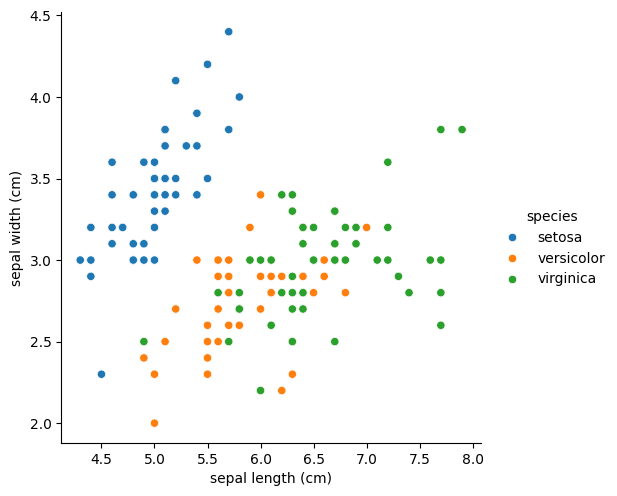

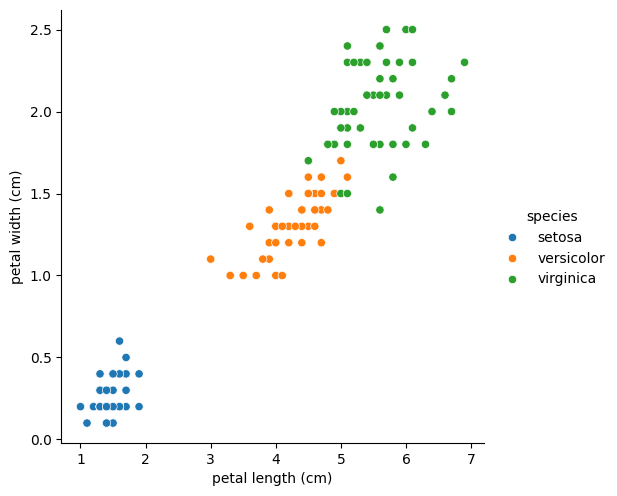

In [17]:
#데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, x_vars=['sepal length (cm)'],y_vars=['sepal width (cm)'], hue='species',height=5) #hue를 기준으로 색상을 다르게, 산점도
sns.pairplot(df, x_vars=['petal length (cm)'],y_vars=['petal width (cm)'], hue='species',height=5)
plt.show()

In [19]:
import numpy as np
w=model.coef_
b=model.intercept_
print("w=\n", np.round(w,2), "\n\n b= \n",np.round(b,2))

w=
 [[-0.39  1.95 -3.98 -1.94]
 [ 0.76  0.12 -0.34 -2.19]
 [-0.37 -2.08  4.32  4.13]] 

 b= 
 [ 13.3    3.34 -16.64]


In [20]:
x_set=[[5.0,2.5,2.0,1.0]] # iris_setosa 데이터
x_ver=[[6.0,3.0,4.5,1.5]] # iris_versicolor 데이터
x_vir=[[6.0,3.0,5.0,2.0]] # iris_verginica 데이터

In [22]:
def H(x):
  Hx=np.matmul(x,w.T)+b # Hx=np.dot(x, w.T)+b
  return 1/(1+np.exp(-Hx))

# (1) y': H(x)

print("(1) H(x) : 모델 예측값(y') ")
print(" H(x1) : ", H(x_set))
print(" H(x2) : ", H(x_ver))
print(" H(x3) : ", H(x_vir))

(1) H(x) : 모델 예측값(y') 
 H(x1) :  [[9.98216903e-01 9.89640087e-01 1.86991016e-05]]
 H(x2) :  [[0.01787818 0.9687774  0.63904963]]
 H(x3) :  [[9.42676238e-04 8.97483861e-01 9.91807173e-01]]


In [23]:
# (2) 소프트맥스 추정 확률
print("(2) 소프트맥스 추정 확률 s(y') ")
print(" setosa :", np.round(model.predict_proba(x_set),2))
print(" versicolor :", np.round(model.predict_proba(x_ver),2))
print(" virginica :", np.round(model.predict_proba(x_vir),2))

(2) 소프트맥스 추정 확률 s(y') 
 setosa : [[0.85 0.15 0.  ]]
 versicolor : [[0.   0.95 0.05]]
 virginica : [[0.   0.07 0.93]]


In [24]:
print("(3) One-hot-encoding 결과 y ")
print(" 입력 : setosa > ", model.predict(x_set))
print(" 입력 : versicolor > ", model.predict(x_ver))
print(" 입력 : virginica > ", model.predict(x_vir))

(3) One-hot-encoding 결과 y 
 입력 : setosa >  [0]
 입력 : versicolor >  [1]
 입력 : virginica >  [2]
